# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
icf = pd.read_csv('insurance fraud claim.csv')

In [3]:
icf

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# OBS-:
1. _c39 column has more nan values thereofore need to be dropped
2. ploice report available column has ? which is consider to be nan
3. basically its a logistic problem with having 0/1 target prediction.

In [5]:
icf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# data preprocessing

In [6]:
icf.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
icf.describe(include='O')

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,...,4,5,7,7,1000,3,3,14,39,2
top,05-08-1992,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,9169 Pine Ridge,?,?,Suburu,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,...,354,292,262,157,1,360,343,80,43,753


In [36]:
obj = icf[['policy_state','policy_csl','insured_sex','authorities_contacted','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','incident_severity','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']]

In [37]:
obj

,policy_state,policy_csl,insured_sex,authorities_contacted,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,Police,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Major Damage,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,Police,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Minor Damage,VA,Riverwood,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,Police,PhD,sales,board-games,own-child,Multi-vehicle Collision,Minor Damage,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,Police,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Major Damage,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,None,Associate,sales,board-games,unmarried,Vehicle Theft,Minor Damage,NY,Arlington,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Fire,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Minor Damage,NC,Northbrook,YES,?,Honda,Accord,N
996,IL,100/300,FEMALE,Fire,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Major Damage,SC,Northbend,YES,?,Volkswagen,Passat,N
997,OH,250/500,FEMALE,Police,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Minor Damage,NC,Arlington,?,YES,Suburu,Impreza,N
998,IL,500/1000,MALE,Other,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Major Damage,NY,Arlington,?,YES,Audi,A5,N


In [38]:
for i in obj.columns:
    print(i)
    print(obj[i].unique())
    print('-----'*20)

policy_state
['OH' 'IN' 'IL']
----------------------------------------------------------------------------------------------------
policy_csl
['250/500' '100/300' '500/1000']
----------------------------------------------------------------------------------------------------
insured_sex
['MALE' 'FEMALE']
----------------------------------------------------------------------------------------------------
authorities_contacted
['Police' 'None' 'Fire' 'Other' 'Ambulance']
----------------------------------------------------------------------------------------------------
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
----------------------------------------------------------------------------------------------------
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'


In [39]:
obj['property_damage'] = obj['property_damage'].replace({'?':'NA'})
obj['police_report_available'] = obj['police_report_available'].replace({'?':'NA'})

In [40]:
obj.drop(['policy_csl','insured_hobbies'], axis = 1, inplace = True)

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

In [42]:
obj.columns

Index(['policy_state', 'insured_sex', 'authorities_contacted',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'incident_type', 'incident_severity', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [45]:
obj['policy_state'] = le.fit_transform(obj['policy_state'])
obj['insured_sex'] = le.fit_transform(obj['insured_sex'])
obj['authorities_contacted'] = le.fit_transform(obj['authorities_contacted'])
obj['insured_education_level'] = le.fit_transform(obj['insured_education_level'])
obj['insured_occupation'] = le.fit_transform(obj['insured_occupation'])
obj['insured_relationship'] = le.fit_transform(obj['insured_relationship'])
obj['incident_type'] = le.fit_transform(obj['incident_type'])
obj['incident_severity'] = le.fit_transform(obj['incident_severity'])
obj['incident_state'] = le.fit_transform(obj['incident_state'])
obj['incident_city'] = le.fit_transform(obj['incident_city'])
obj['property_damage'] = le.fit_transform(obj['property_damage'])
obj['police_report_available'] = le.fit_transform(obj['police_report_available'])
obj['auto_make'] = le.fit_transform(obj['auto_make'])
obj['auto_model'] = le.fit_transform(obj['auto_model'])
obj['fraud_reported'] = le.fit_transform(obj['fraud_reported'])

In [52]:
df = icf[['number_of_vehicles_involved','bodily_injuries','witnesses']]

In [53]:
obj = pd.concat([obj,df], axis=1)
obj

,policy_state,insured_sex,authorities_contacted,insured_education_level,insured_occupation,insured_relationship,incident_type,incident_severity,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,number_of_vehicles_involved,bodily_injuries,witnesses
0,2,1,4,4,2,0,2,0,4,1,2,2,10,1,1,1,1,2
1,1,1,4,4,6,2,3,1,5,5,0,0,8,12,1,1,0,0
2,2,0,4,6,11,3,0,1,1,1,1,1,4,30,0,3,2,3
3,0,0,4,6,1,4,2,0,2,0,0,1,3,34,1,1,1,2
4,0,1,2,0,11,4,3,1,1,0,1,1,0,31,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,1,5,2,4,2,1,0,4,2,0,6,6,0,1,0,1
996,0,0,1,6,9,5,2,0,4,3,2,0,13,28,0,1,2,3
997,2,0,4,5,1,2,0,1,0,0,0,2,11,19,0,3,2,3
998,0,1,3,0,5,5,2,0,1,0,0,2,1,5,0,1,0,1


In [58]:
num = icf[['age','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']]

In [54]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1000 non-null   int64  
 1   policy_deductable      1000 non-null   int64  
 2   policy_annual_premium  1000 non-null   float64
 3   umbrella_limit         1000 non-null   int64  
 4   insured_zip            1000 non-null   int64  
 5   capital-gains          1000 non-null   int64  
 6   capital-loss           1000 non-null   int64  
 7   total_claim_amount     1000 non-null   int64  
 8   injury_claim           1000 non-null   int64  
 9   property_claim         1000 non-null   int64  
 10  vehicle_claim          1000 non-null   int64  
 11  auto_year              1000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [55]:
scaler = StandardScaler()

In [59]:
num['age'] = scaler.fit_transform(num['age'].to_numpy().reshape(-1,1))
num['policy_deductable'] = scaler.fit_transform(num['policy_deductable'].to_numpy().reshape(-1,1))
num['policy_annual_premium'] = scaler.fit_transform(num['policy_annual_premium'].to_numpy().reshape(-1,1))
num['umbrella_limit'] = scaler.fit_transform(num['umbrella_limit'].to_numpy().reshape(-1,1))
num['insured_zip'] = scaler.fit_transform(num['insured_zip'].to_numpy().reshape(-1,1))
num['capital-gains'] = scaler.fit_transform(num['capital-gains'].to_numpy().reshape(-1,1))
num['capital-loss'] = scaler.fit_transform(num['capital-loss'].to_numpy().reshape(-1,1))
num['total_claim_amount'] = scaler.fit_transform(num['total_claim_amount'].to_numpy().reshape(-1,1))
num['injury_claim'] = scaler.fit_transform(num['injury_claim'].to_numpy().reshape(-1,1))
num['property_claim'] = scaler.fit_transform(num['property_claim'].to_numpy().reshape(-1,1))
num['vehicle_claim'] = scaler.fit_transform(num['vehicle_claim'].to_numpy().reshape(-1,1))

In [61]:
num.head()

,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,0.990836,-0.222383,0.616705,-0.479476,-0.489529,1.011331,0.953851,0.714257,-0.189283,1.165505,0.749653
1,0.334073,1.412784,-0.242521,1.697980,-0.461008,-0.901927,0.953851,-1.807312,-1.363822,-1.372696,-1.823346
2,-1.088913,1.412784,0.642233,1.697980,-0.984885,0.358023,0.953851,-0.686362,0.054644,-0.736072,-0.785565
3,0.224613,1.412784,0.652886,2.133471,1.491682,0.853388,-1.267577,0.403135,-0.224130,-0.219722,0.677607
4,0.552994,-0.222383,1.341980,2.133471,1.527808,1.467210,-0.683741,-1.753121,-1.257232,-1.399654,-1.768252


In [62]:
num.isnull().sum()

age                      0
policy_deductable        0
policy_annual_premium    0
umbrella_limit           0
insured_zip              0
capital-gains            0
capital-loss             0
total_claim_amount       0
injury_claim             0
property_claim           0
vehicle_claim            0
dtype: int64

In [63]:
obj.isnull().sum()

policy_state                   0
insured_sex                    0
authorities_contacted          0
insured_education_level        0
insured_occupation             0
insured_relationship           0
incident_type                  0
incident_severity              0
incident_state                 0
incident_city                  0
property_damage                0
police_report_available        0
auto_make                      0
auto_model                     0
fraud_reported                 0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
dtype: int64

In [65]:
icf_final = pd.concat([num,obj], axis =1)
icf_final.head()

,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,...,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,number_of_vehicles_involved,bodily_injuries,witnesses
0,0.990836,-0.222383,0.616705,-0.479476,-0.489529,1.011331,0.953851,0.714257,-0.189283,1.165505,...,4,1,2,2,10,1,1,1,1,2
1,0.334073,1.412784,-0.242521,1.697980,-0.461008,-0.901927,0.953851,-1.807312,-1.363822,-1.372696,...,5,5,0,0,8,12,1,1,0,0
2,-1.088913,1.412784,0.642233,1.697980,-0.984885,0.358023,0.953851,-0.686362,0.054644,-0.736072,...,1,1,1,1,4,30,0,3,2,3
3,0.224613,1.412784,0.652886,2.133471,1.491682,0.853388,-1.267577,0.403135,-0.224130,-0.219722,...,2,0,0,1,3,34,1,1,1,2
4,0.552994,-0.222383,1.341980,2.133471,1.527808,1.467210,-0.683741,-1.753121,-1.257232,-1.399654,...,1,0,1,1,0,31,0,1,0,1


# EDA

In [66]:
icf

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [67]:
obj_eda = icf[['policy_state','policy_csl','insured_sex','authorities_contacted','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','incident_severity','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']]

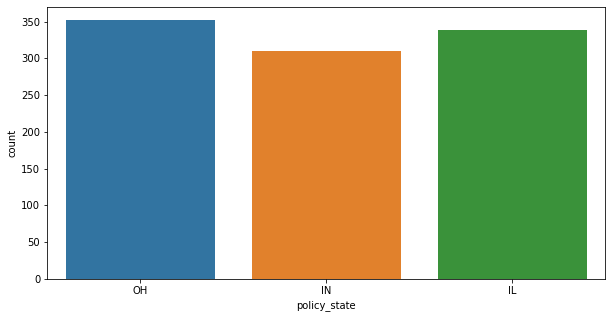

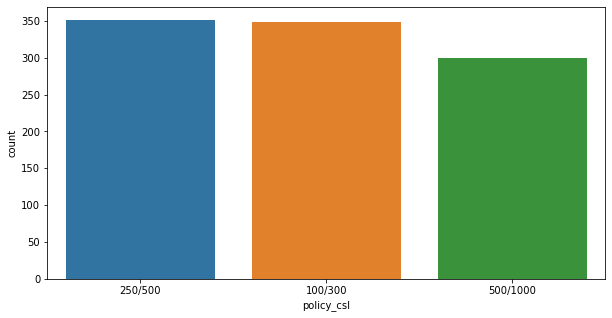

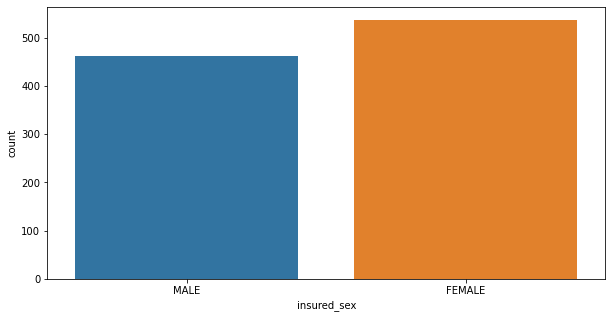

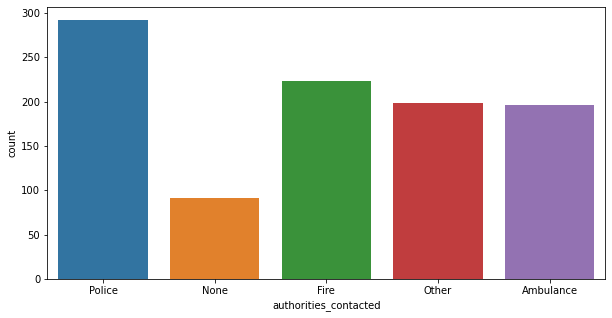

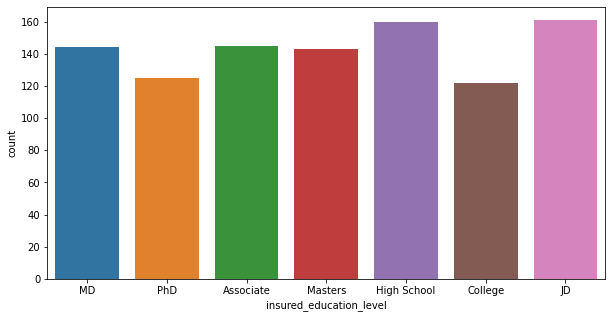

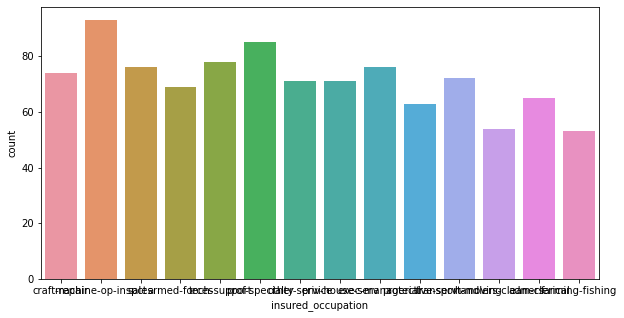

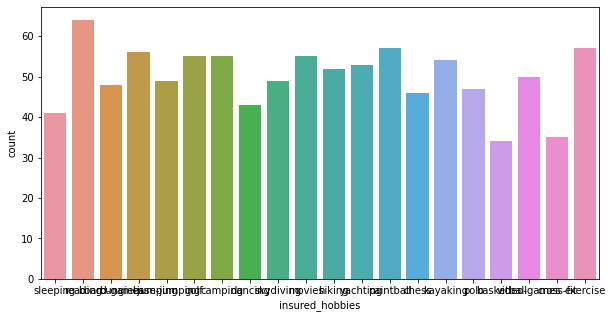

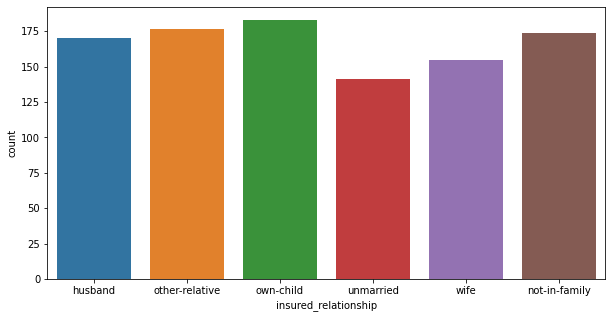

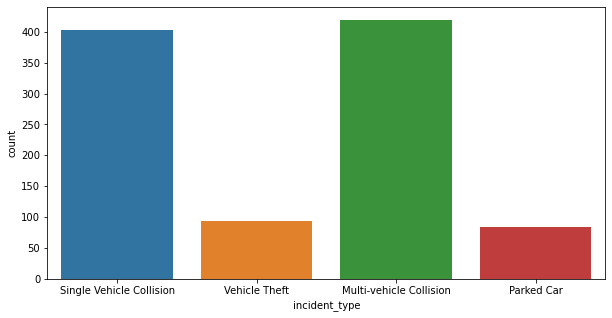

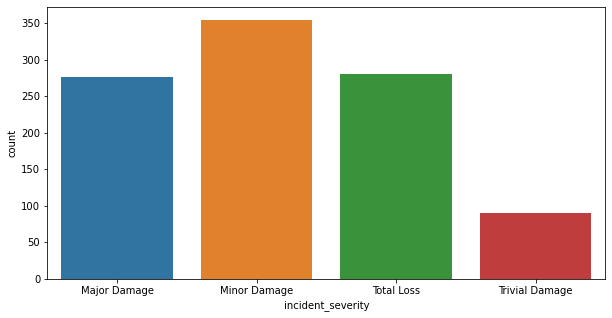

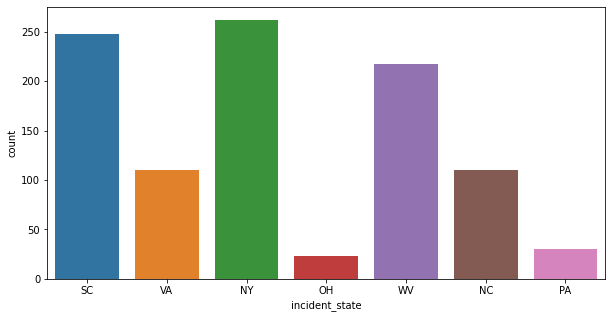

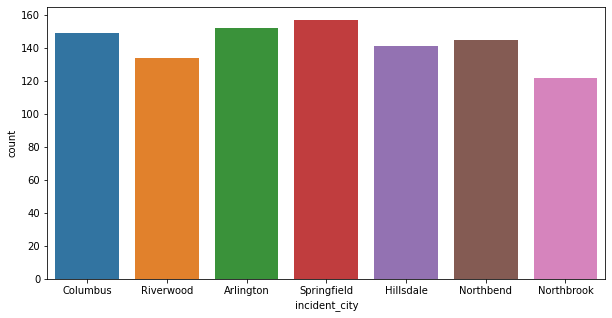

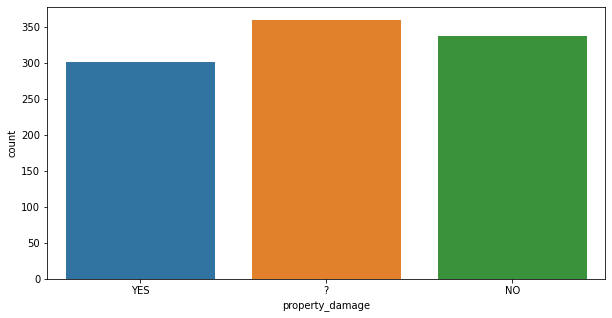

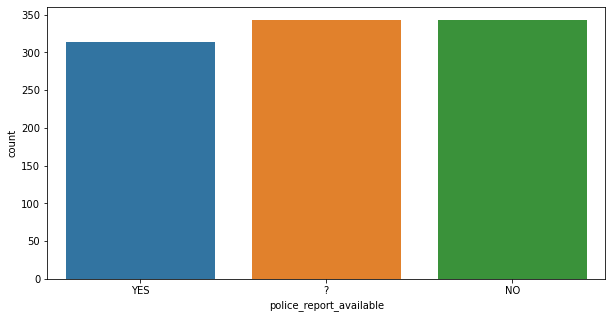

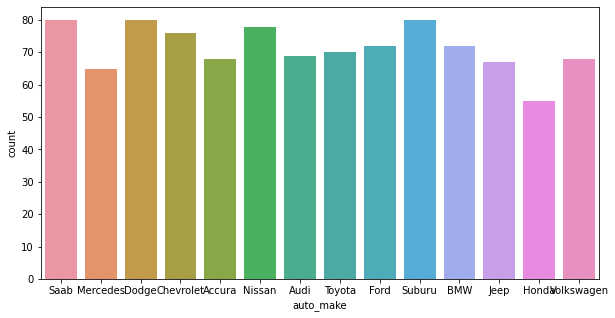

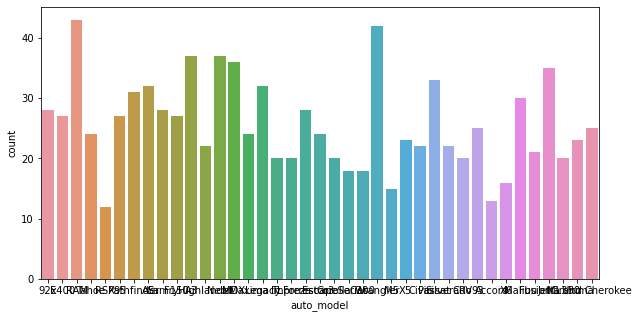

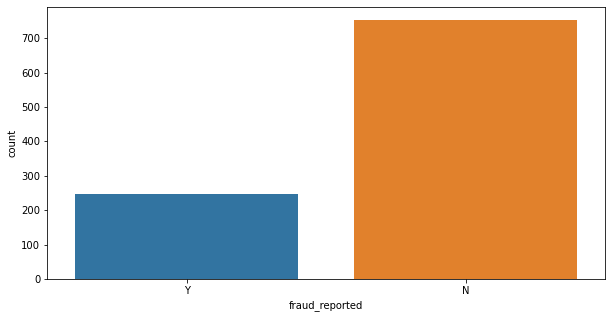

In [70]:
for i in obj_eda.columns:
    plt.figure(figsize= (10,5))
    sns.countplot(obj_eda[i])
    print('\n')

* all classes are almost equal
* target variable is unequal yet there are suffiecient cases for yes

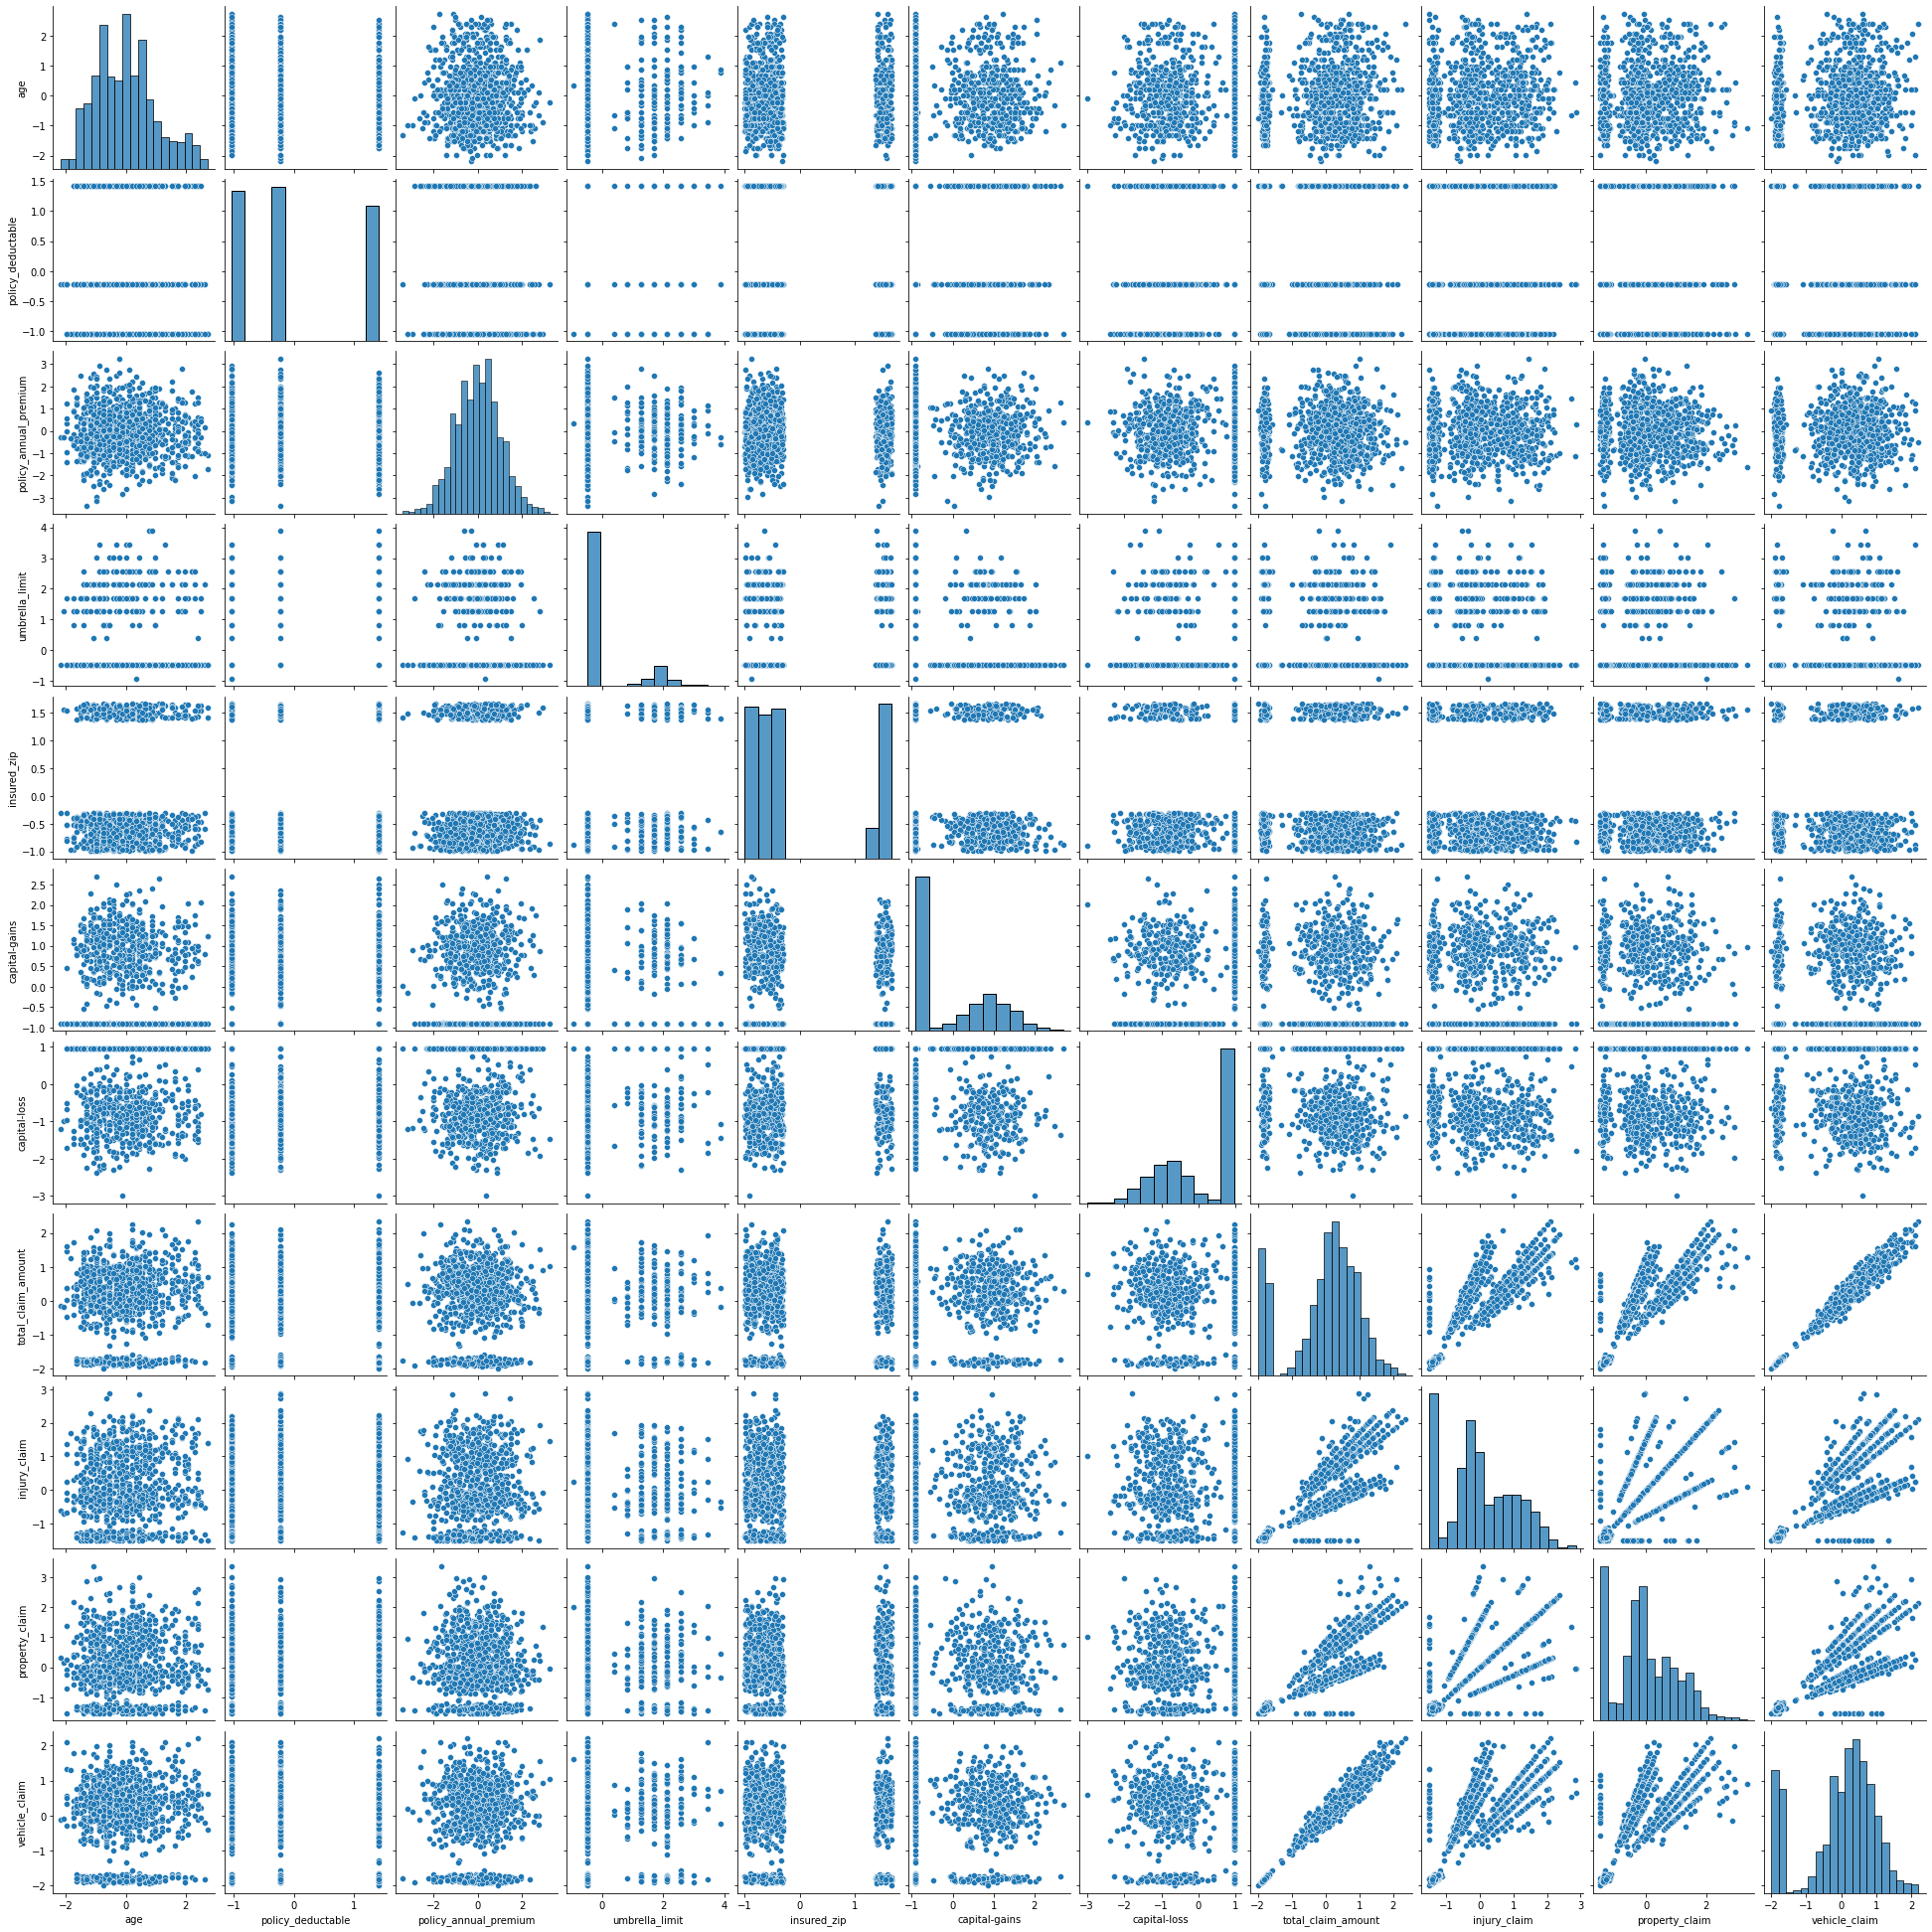

In [73]:
sns.pairplot(num)

In [74]:
num.corr()

,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim
age,1.000000,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.069863,0.075522,0.060898,0.062588
policy_deductable,0.029188,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.022839,0.039107,0.064792,0.005269
policy_annual_premium,0.014404,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,0.009094,-0.017633,-0.011654,0.020246
umbrella_limit,0.018126,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.040344,-0.045412,-0.023790,-0.038584
insured_zip,0.025604,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,-0.033873,-0.017495,-0.006841,-0.041083
capital-gains,-0.007075,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,0.015980,0.025934,-0.000779,0.015836
capital-loss,0.007368,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.036060,-0.046060,-0.022863,-0.032665
total_claim_amount,0.069863,0.022839,0.009094,-0.040344,-0.033873,0.015980,-0.036060,1.000000,0.805025,0.810686,0.982773
injury_claim,0.075522,0.039107,-0.017633,-0.045412,-0.017495,0.025934,-0.046060,0.805025,1.000000,0.563866,0.722878
property_claim,0.060898,0.064792,-0.011654,-0.023790,-0.006841,-0.000779,-0.022863,0.810686,0.563866,1.000000,0.732090


<AxesSubplot:>

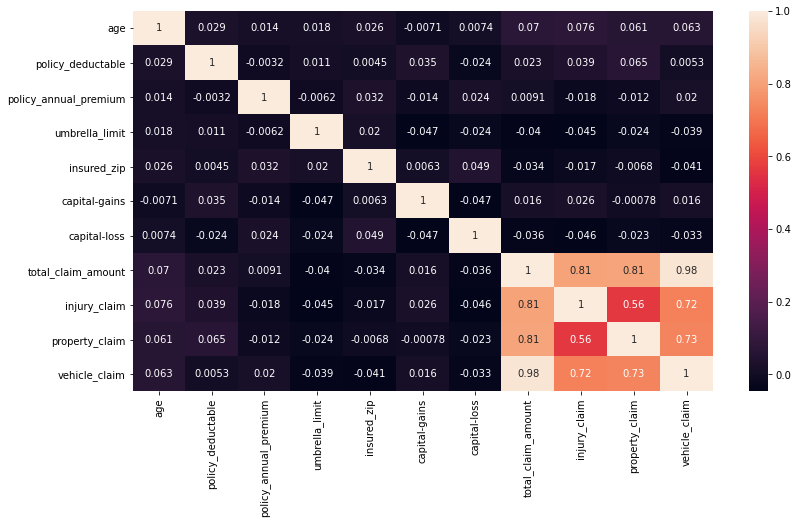

In [75]:
plt.figure(figsize = (13,7))
sns.heatmap(num.corr(), annot=True)

<AxesSubplot:>

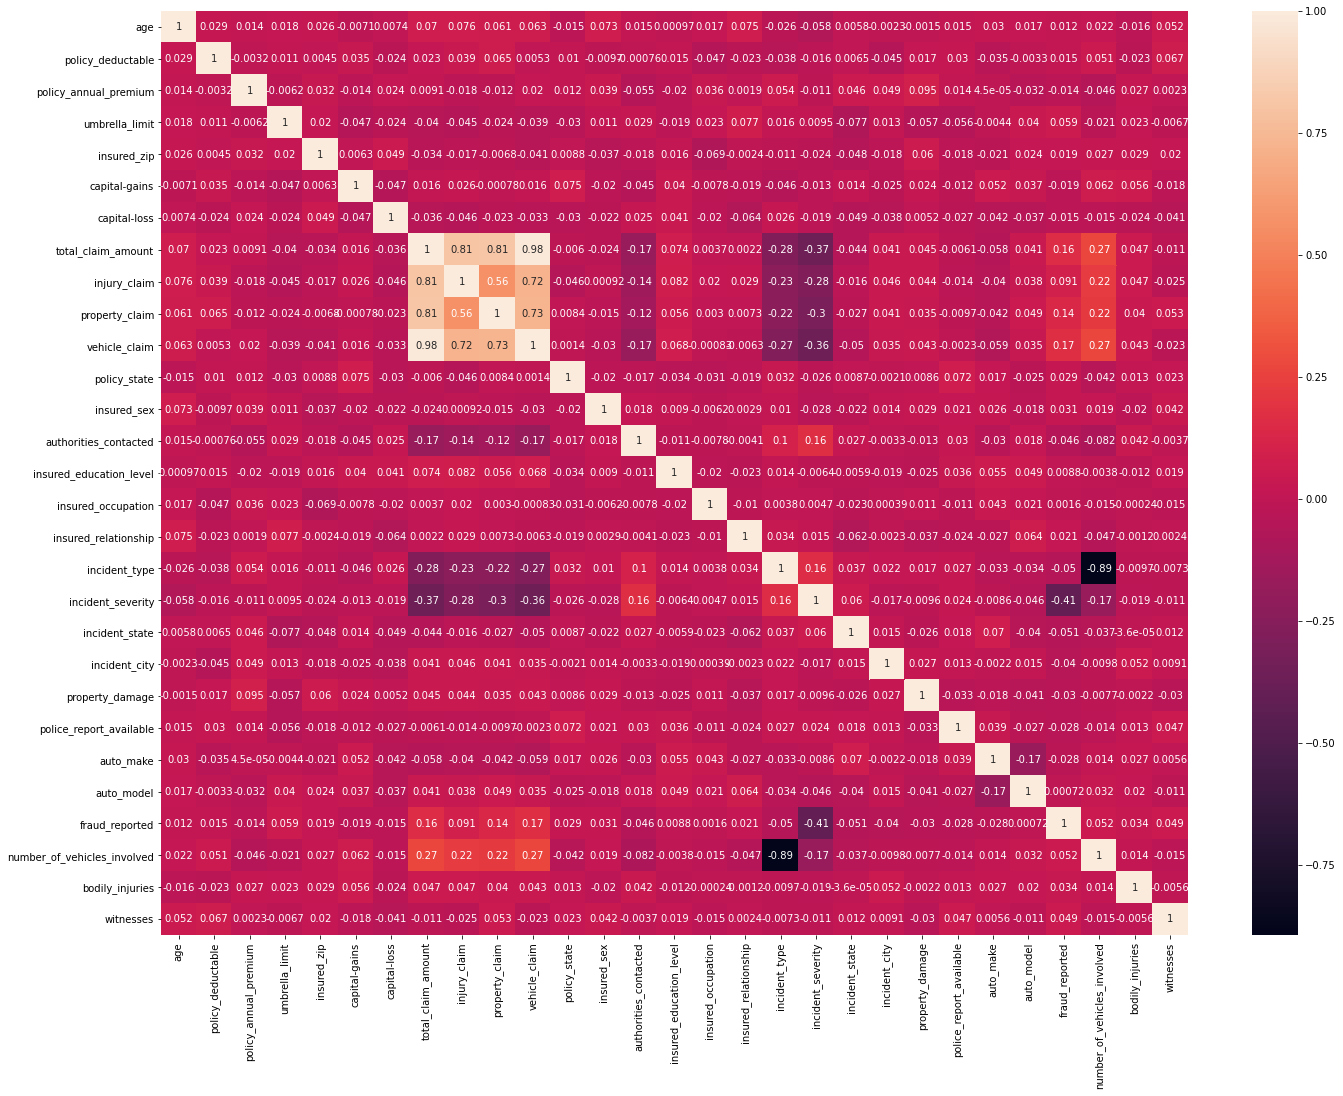

In [78]:
plt.figure(figsize = (23,17))
sns.heatmap(icf_final.corr(), annot=True)

* our target variable has almost neutral correlation with all variables

# checking for outliers

<AxesSubplot:>

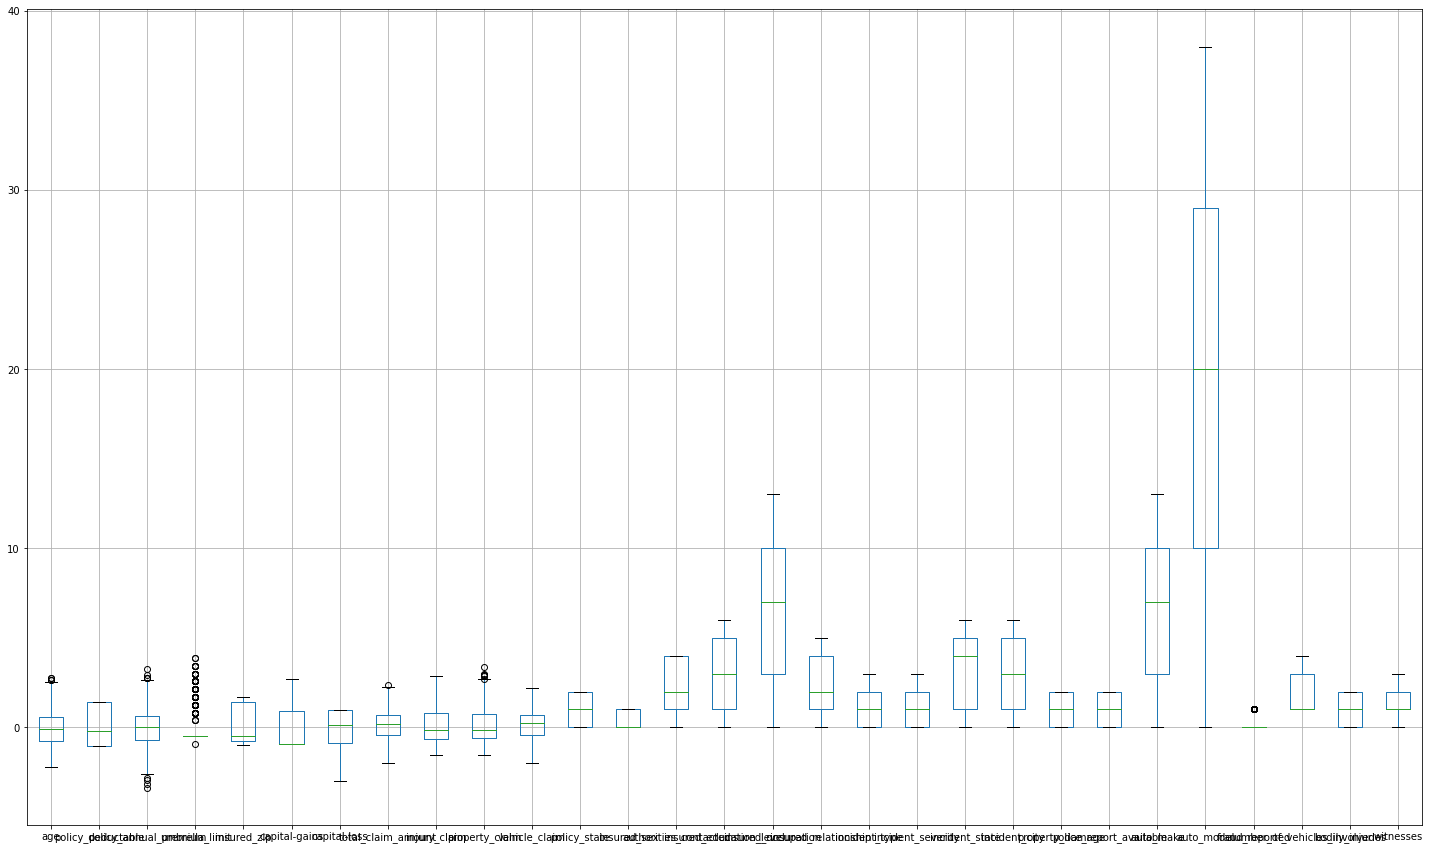

In [81]:
plt.figure(figsize=(25,15))
icf_final.boxplot()

In [82]:
from scipy.stats import zscore
z = np.abs(zscore(icf_final))
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 9, 3, 3, 3, 2, 6, 3, 3, 3],
      dtype=int64))


In [83]:
icf_final = icf_final[(z<3).all(axis=1)]

<AxesSubplot:>

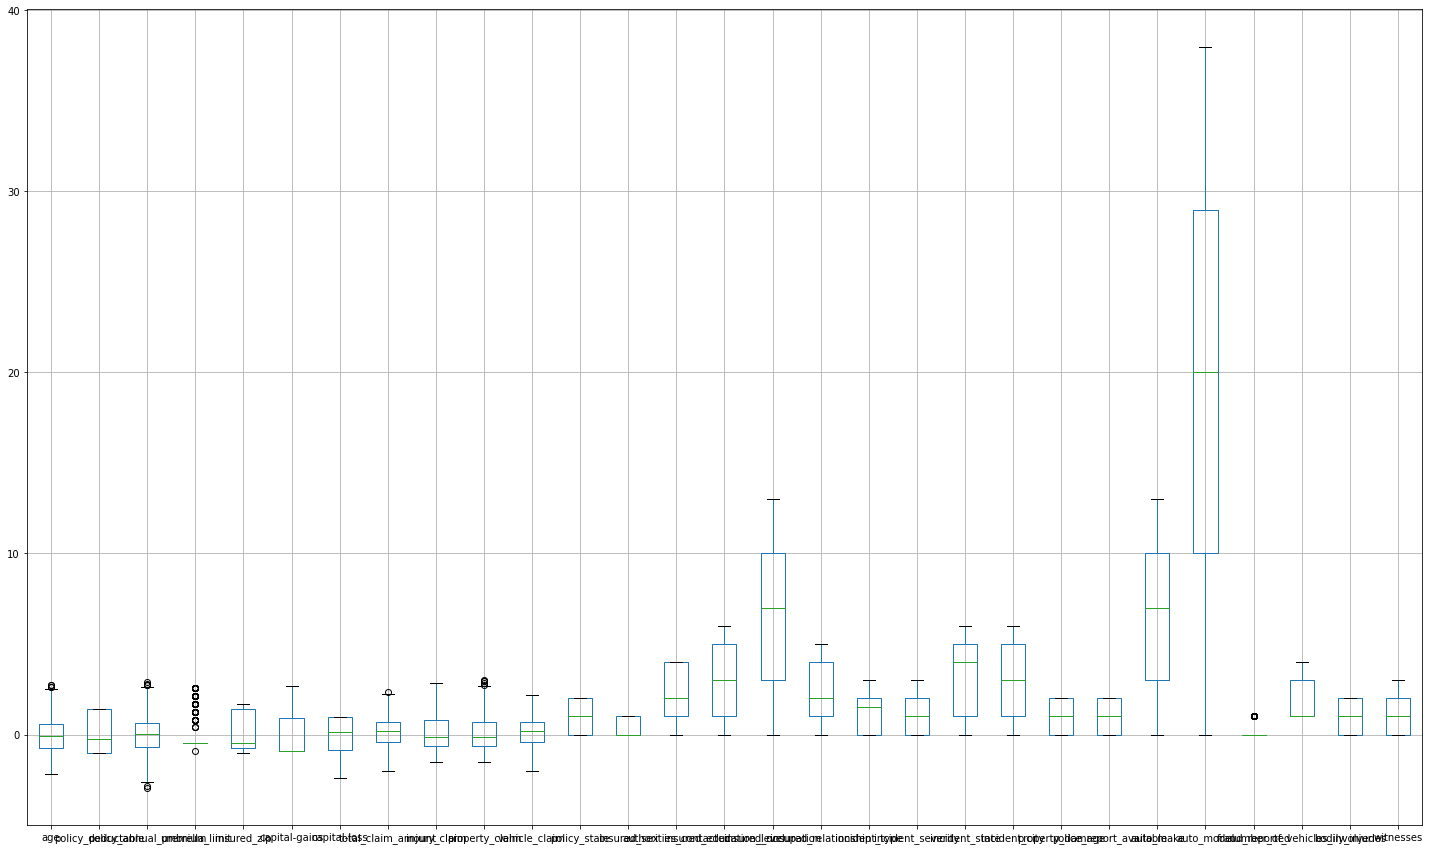

In [84]:
plt.figure(figsize=(25,15))
icf_final.boxplot()

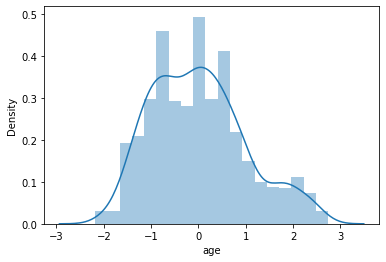

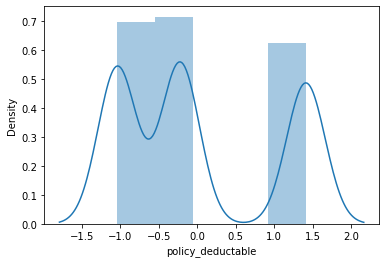

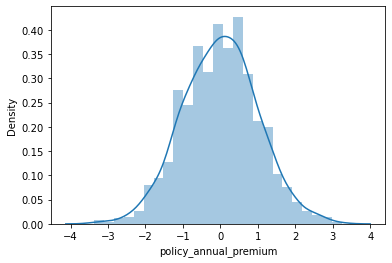

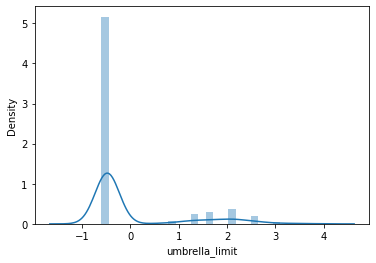

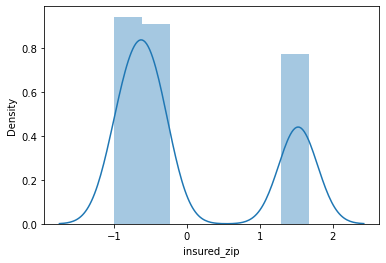

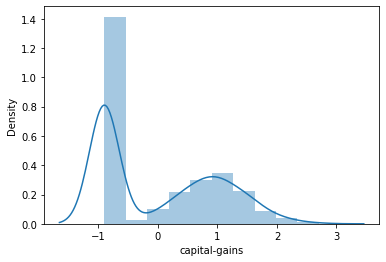

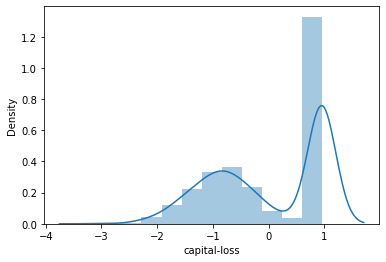

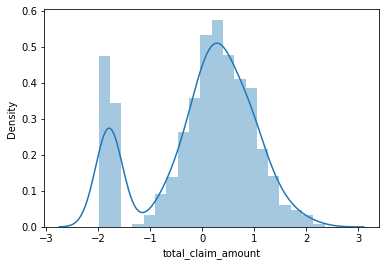

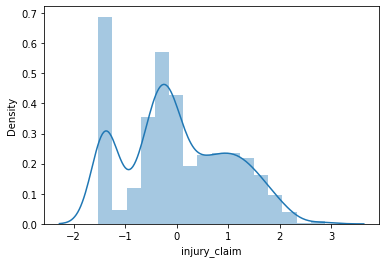

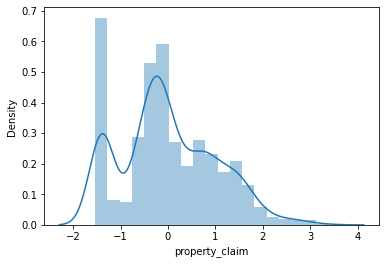

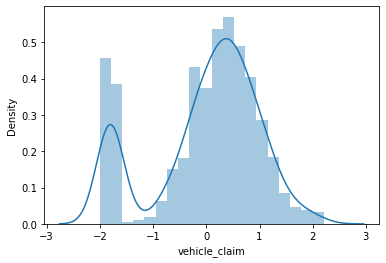

In [85]:
for i in num.columns:
    plt.figure()
    sns.distplot(num[i])

* mostly bimodal data is present

# model building

In [89]:
icf_final.head(2)

,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,...,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,number_of_vehicles_involved,bodily_injuries,witnesses
0,0.990836,-0.222383,0.616705,-0.479476,-0.489529,1.011331,0.953851,0.714257,-0.189283,1.165505,...,4,1,2,2,10,1,1,1,1,2
1,0.334073,1.412784,-0.242521,1.697980,-0.461008,-0.901927,0.953851,-1.807312,-1.363822,-1.372696,...,5,5,0,0,8,12,1,1,0,0


In [87]:
X = icf_final.drop('fraud_reported', axis =1)
y = icf_final.fraud_reported

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn. model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [93]:
models = [lr,dtc,knc,svc,gnb,rfc,abc,gbc]
for m in models:
    m.fit(X_train,y_train)
    pred_m = m.predict(X_test)
    
    print(f'MODEL REPORT: {m}')
    print(confusion_matrix(y_test,pred_m))
    print(classification_report(y_test,pred_m))
    print('\n')

MODEL REPORT: LogisticRegression()
[[219  17]
 [ 65  23]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       236
           1       0.57      0.26      0.36        88

    accuracy                           0.75       324
   macro avg       0.67      0.59      0.60       324
weighted avg       0.72      0.75      0.71       324



MODEL REPORT: DecisionTreeClassifier()
[[200  36]
 [ 53  35]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       236
           1       0.49      0.40      0.44        88

    accuracy                           0.73       324
   macro avg       0.64      0.62      0.63       324
weighted avg       0.71      0.73      0.72       324



MODEL REPORT: KNeighborsClassifier()
[[214  22]
 [ 79   9]]
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       236
           1       0.29      0.10      0.15        88

#### we are selecting 4 models
* lr
* rfc
* abc
* gbc
#### for further evaluation

In [95]:
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
cv = cross_val_score(lr,X,y, cv=5)
print('CV value:', cv)
print('CV mean:', cv.mean())

CV value: [0.79081633 0.75       0.70918367 0.80102041 0.80102041]
CV mean: 0.7704081632653061


In [96]:
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
cv = cross_val_score(rfc,X,y, cv=5)
print('CV value:', cv)
print('CV mean:', cv.mean())

CV value: [0.79081633 0.78061224 0.75       0.77040816 0.81632653]
CV mean: 0.7816326530612245


In [97]:
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)
cv = cross_val_score(abc,X,y, cv=5)
print('CV value:', cv)
print('CV mean:', cv.mean())

CV value: [0.79081633 0.7755102  0.75510204 0.81122449 0.79081633]
CV mean: 0.7846938775510204


In [98]:
gbc.fit(X_train,y_train)
pred_gbc = gbc.predict(X_test)
cv = cross_val_score(gbc,X,y, cv=5)
print('CV value:', cv)
print('CV mean:', cv.mean())

CV value: [0.80102041 0.76530612 0.73979592 0.76020408 0.84183673]
CV mean: 0.7816326530612245


# hyper parameter tunning

In [100]:
lr_param = {
    'C' :[1,3,5,7],
    'fit_intercept': [True,False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'multi_class': ['auto','ovr','multinomial']
}

In [101]:
rdsr_lr = RandomizedSearchCV(estimator=lr, param_distributions=lr_param)
rdsr_lr.fit(X_train,y_train)
print(rdsr_lr.best_score_)
print(rdsr_lr.best_params_)

0.7698473282442747
{'solver': 'lbfgs', 'multi_class': 'auto', 'fit_intercept': False, 'C': 3}


In [102]:
gdsr_lr = GridSearchCV(estimator=lr, param_grid=lr_param)
gdsr_lr.fit(X_train,y_train)
print(gdsr_lr.best_score_)
print(gdsr_lr.best_params_)

0.7713624797594263
{'C': 5, 'fit_intercept': False, 'multi_class': 'multinomial', 'solver': 'saga'}


In [103]:
pred_gdsr_lr = gdsr_lr.predict(X_test)
print(confusion_matrix(y_test,pred_gdsr_lr))
print(classification_report(y_test, pred_gdsr_lr))

[[218  18]
 [ 65  23]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       236
           1       0.56      0.26      0.36        88

    accuracy                           0.74       324
   macro avg       0.67      0.59      0.60       324
weighted avg       0.71      0.74      0.71       324



# roc-auc score and curve

In [104]:
from sklearn.metrics import roc_auc_score, roc_curve

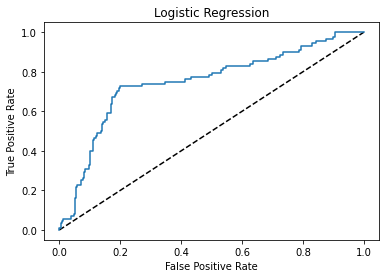

In [115]:
y_pred_proba = gdsr_lr.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [116]:
print(roc_auc_score(y_test,gdsr_lr.predict(X_test)))

0.5925462249614791


In [107]:
abc_param = {
    'n_estimators':[50,70,100],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [0.7,1,2]
}

In [108]:
rdsr_abc = RandomizedSearchCV(estimator=abc, param_distributions=abc_param)
rdsr_abc.fit(X_train,y_train)
print(rdsr_abc.best_score_)
print(rdsr_abc.best_params_)

0.78970622253065
{'n_estimators': 100, 'learning_rate': 0.7, 'algorithm': 'SAMME'}


In [109]:
gdsr_abc = GridSearchCV(estimator=abc, param_grid=abc_param)
gdsr_abc.fit(X_train,y_train)
print(gdsr_abc.best_score_)
print(gdsr_abc.best_params_)

0.78970622253065
{'algorithm': 'SAMME', 'learning_rate': 0.7, 'n_estimators': 100}


In [117]:
pred_gdsr_abc = gdsr_abc.predict(X_test)
print(confusion_matrix(y_test,pred_gdsr_abc))
print(classification_report(y_test, pred_gdsr_abc))

[[208  28]
 [ 42  46]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       236
           1       0.62      0.52      0.57        88

    accuracy                           0.78       324
   macro avg       0.73      0.70      0.71       324
weighted avg       0.77      0.78      0.78       324



# roc-auc score and curve

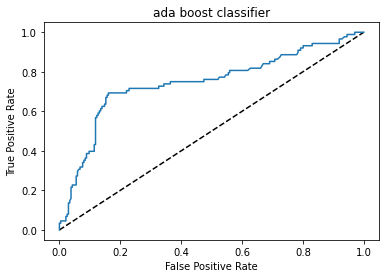

In [118]:
y_pred_proba = gdsr_abc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'ada boost classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ada boost classifier')
plt.show()

In [119]:
print(roc_auc_score(y_test,gdsr_abc.predict(X_test)))

0.7020416024653313


# Saving the best model

In [120]:
import joblib
joblib.dump(gdsr_abc, 'gdsr_abc_file.obj')

['gdsr_abc_file.obj']

# --------------------------------------------------END------------------------------------------------------